# Import Dependencies

In [1]:
import cv2
import pandas
import warnings
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

##### Loading Function for Image

In [2]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org = (50,300),fontFace = font,fontScale =5,color = (255,255,255),thickness = 25)
    return blank_img

##### Displaying Function for Image

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = 'gray')

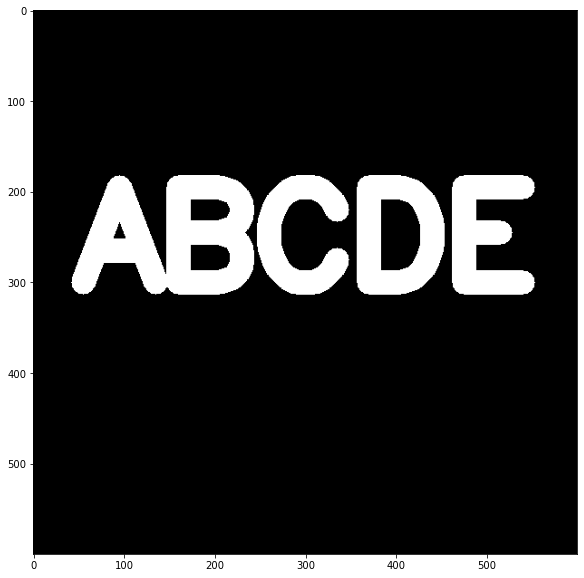

In [4]:
img = load_img()
display_img(img)

### 1. Erode Morphological Operator

In [5]:
kernal = np.ones((5,5),dtype = np.uint8)

In [6]:
kernal

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [7]:
result = cv2.erode(img,kernal,iterations = 1)

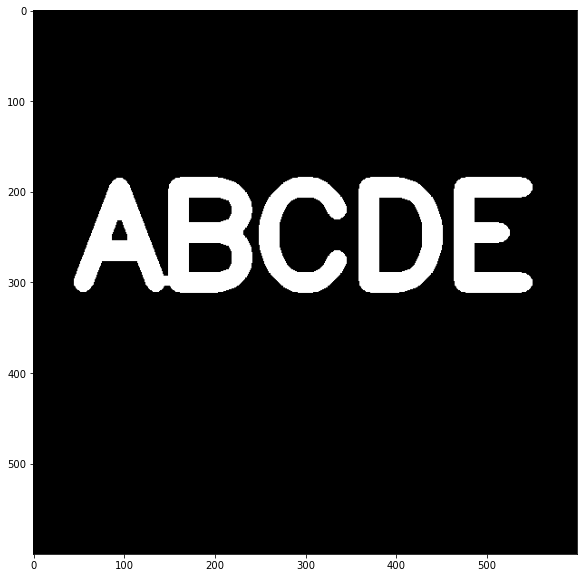

In [8]:
display_img(result)

In [9]:
result = cv2.erode(img,kernal,iterations = 4)

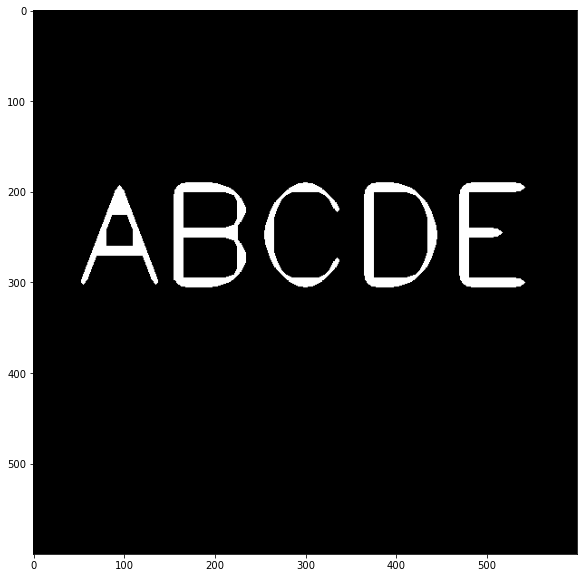

In [10]:
display_img(result)

In [11]:
img = load_img()

##### Adding Noise to Image

In [12]:
white_noise = np.random.randint(low = 0,high =2, size= (600,600))

In [13]:
white_noise

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 1, 1]])

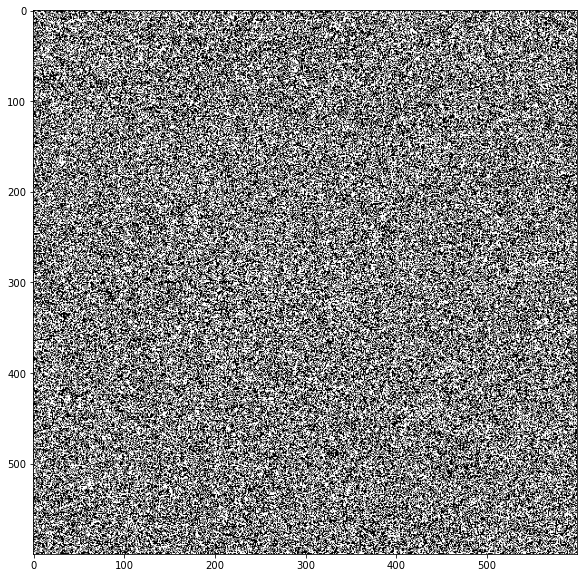

In [14]:
display_img(white_noise)

In [15]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
img.max()

255.0

In [17]:
white_noise = white_noise * 255

In [18]:
white_noise

array([[  0,   0,   0, ..., 255,   0,   0],
       [  0,   0, 255, ...,   0, 255, 255],
       [  0, 255,   0, ...,   0, 255,   0],
       ...,
       [  0,   0, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255,   0,   0],
       [  0, 255, 255, ...,   0, 255, 255]])

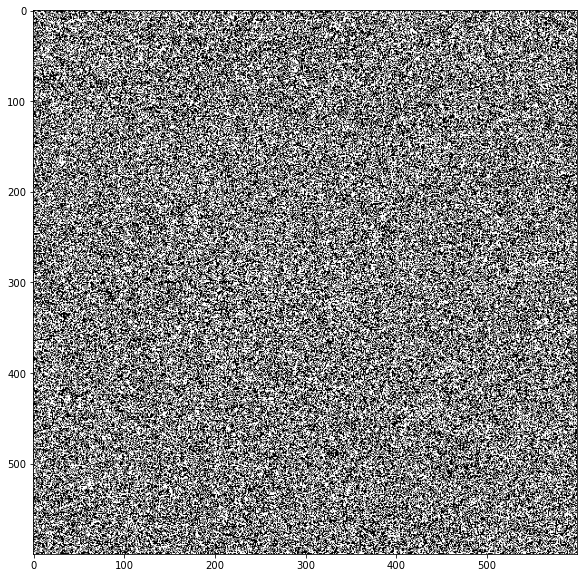

In [19]:
display_img(white_noise)

In [20]:
noise_img = white_noise + img

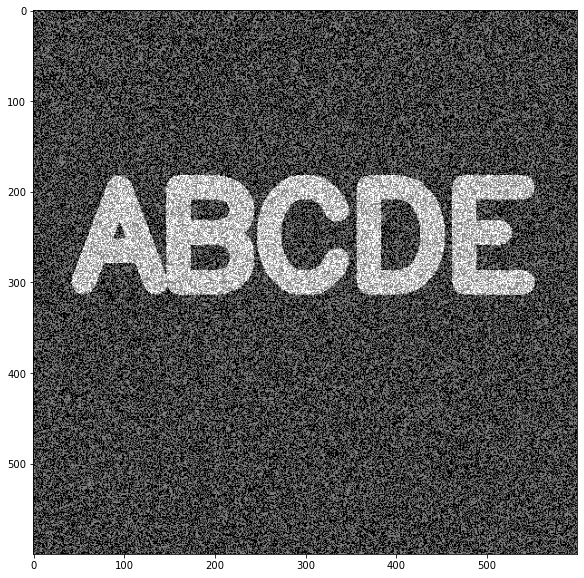

In [21]:
display_img(noise_img)

### 2. Open Morphological Operator

In [22]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN,kernal)

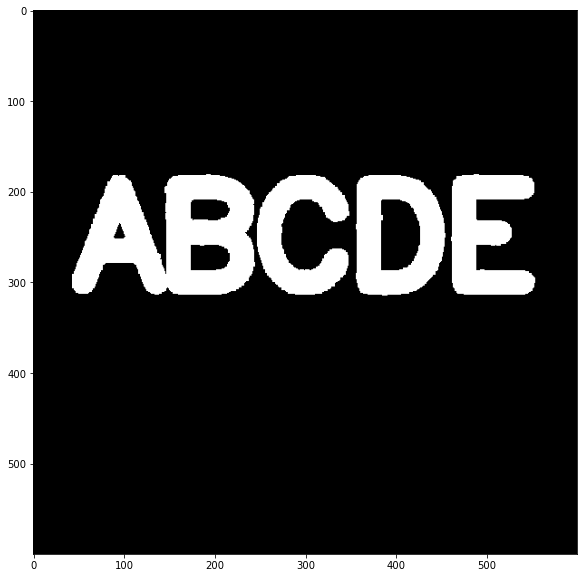

In [23]:
display_img(opening)

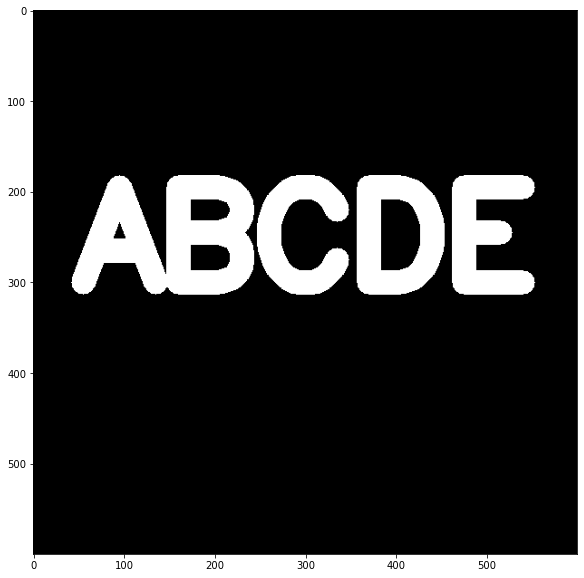

In [24]:
display_img(img) # Displaying Orignal Image

In [25]:
img = load_img()

In [26]:
black_noise = np.random.randint(low =0,high =2, size = (600,600))

In [27]:
black_noise = black_noise * -255

In [28]:
black_noise

array([[-255,    0, -255, ...,    0, -255,    0],
       [-255, -255, -255, ...,    0,    0, -255],
       [-255, -255,    0, ...,    0, -255, -255],
       ...,
       [-255,    0, -255, ...,    0, -255,    0],
       [-255,    0, -255, ..., -255,    0, -255],
       [-255,    0,    0, ...,    0,    0, -255]])

In [29]:
black_noise_img = black_noise + img

In [30]:
black_noise_img

array([[-255.,    0., -255., ...,    0., -255.,    0.],
       [-255., -255., -255., ...,    0.,    0., -255.],
       [-255., -255.,    0., ...,    0., -255., -255.],
       ...,
       [-255.,    0., -255., ...,    0., -255.,    0.],
       [-255.,    0., -255., ..., -255.,    0., -255.],
       [-255.,    0.,    0., ...,    0.,    0., -255.]])

In [31]:
black_noise_img[black_noise_img == -255] = 0

In [32]:
black_noise_img.min()

0.0

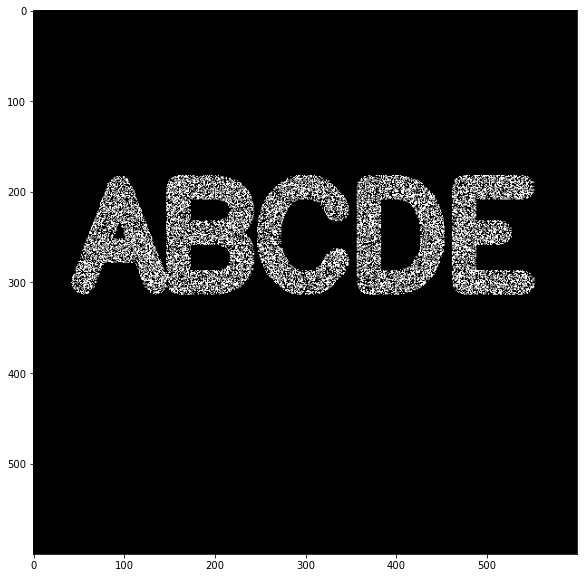

In [33]:
display_img(black_noise_img)

### 3. Dilation Morphological Operator

In [34]:
img = load_img()

In [35]:
dilation = cv2.morphologyEx(img,cv2.MORPH_DILATE,kernal)

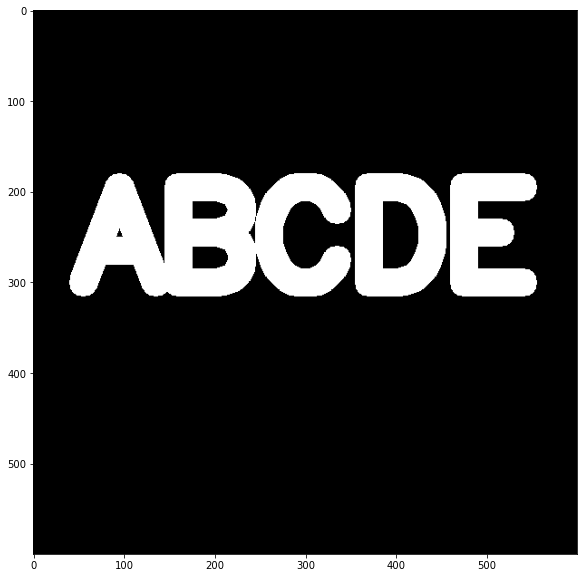

In [36]:
display_img(dilation)

### 4. Close Morphological Operator

In [37]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernal)

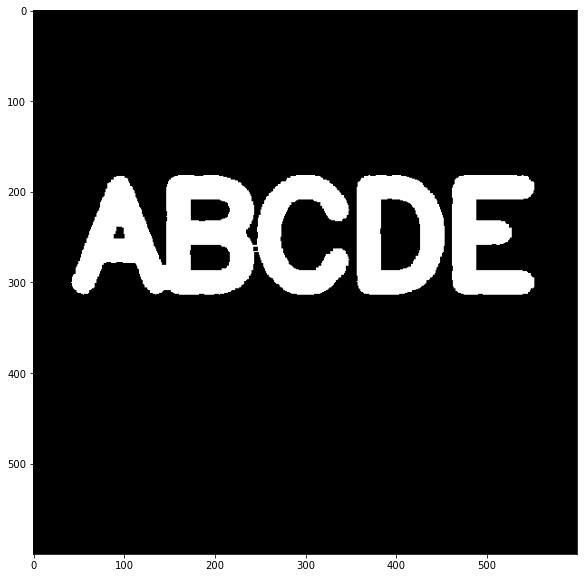

In [38]:
display_img(closing)

### 5. Morphological Gradient(It is a kind of edge detection)

In [39]:
img = load_img()

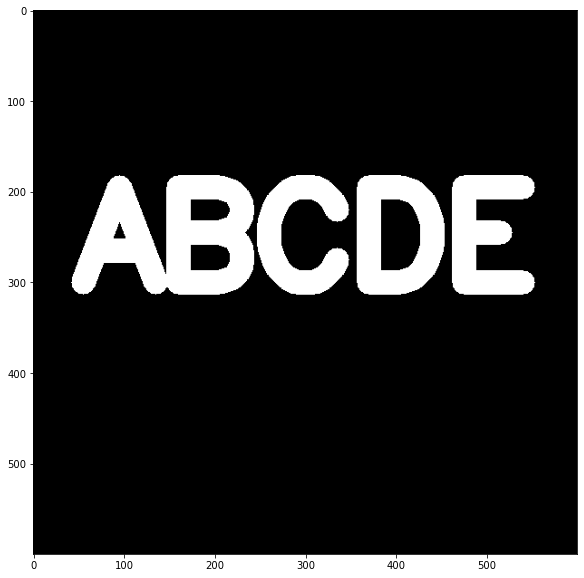

In [40]:
display_img(img)

In [41]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernal)

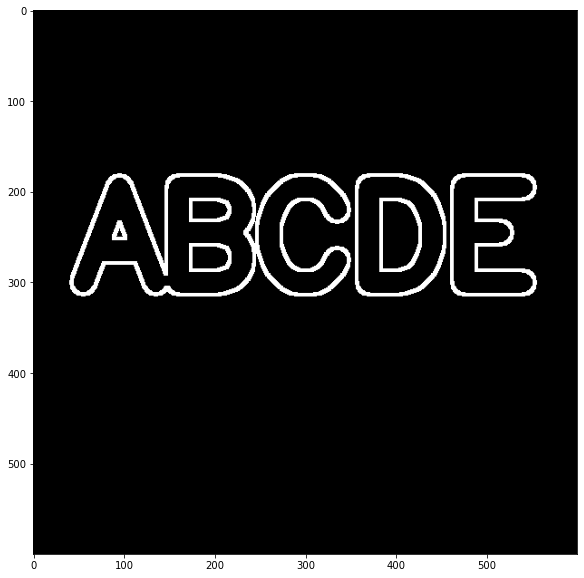

In [42]:
display_img(gradient)

# Great Work!